Example data with mixed categorical data


In [28]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

symboling  normalized_losses         make fuel_type aspiration num_doors  \
0          3                NaN  alfa-romero       gas        std       two   
1          3                NaN  alfa-romero       gas        std       two   
2          1                NaN  alfa-romero       gas        std       two   
3          2              164.0         audi       gas        std      four   
4          2              164.0         audi       gas        std      four   

    body_style drive_wheels engine_location  wheel_base   ...     engine_size  \
0  convertible          rwd           front        88.6   ...             130   
1  convertible          rwd           front        88.6   ...             130   
2    hatchback          rwd           front        94.5   ...             152   
3        sedan          fwd           front        99.8   ...             109   
4        sedan          4wd           front        99.4   ...             136   

   fuel_system  bore  stroke compression_ratio horsepower  peak_rpm city_mpg  \
0         mpfi  3.47    2.68               9.0      111.0    5000.0       21   
1         mpfi  3.47    2.68               9.0      111.0    5000.0       21   
2         mpfi  2.68    3.47               9.0      154.0    5000.0       19   
3         mpfi  3.19    3.40              10.0      102.0    5500.0       24   
4         mpfi  3.19    3.40               8.0      115.0    5500.0       18   

   highway_mpg    price  
0           27  13495.0  
1           27  16500.0  
2           26  16500.0  
3           30  13950.0  
4           22  17450.0  

[5 rows x 26 columns]

Get type of columns


In [2]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [4]:
df[df.isnull().any(axis=1)]

symboling  normalized_losses           make fuel_type aspiration  \
0            3                NaN    alfa-romero       gas        std   
1            3                NaN    alfa-romero       gas        std   
2            1                NaN    alfa-romero       gas        std   
5            2                NaN           audi       gas        std   
7            1                NaN           audi       gas        std   
9            0                NaN           audi       gas      turbo   
14           1                NaN            bmw       gas        std   
15           0                NaN            bmw       gas        std   
16           0                NaN            bmw       gas        std   
17           0                NaN            bmw       gas        std   
27           1              148.0          dodge       gas      turbo   
43           0                NaN          isuzu       gas        std   
44           1                NaN          isuzu       gas        std   
45           0                NaN          isuzu       gas        std   
46           2                NaN          isuzu       gas        std   
48           0                NaN         jaguar       gas        std   
49           0                NaN         jaguar       gas        std   
55           3              150.0          mazda       gas        std   
56           3              150.0          mazda       gas        std   
57           3              150.0          mazda       gas        std   
58           3              150.0          mazda       gas        std   
63           0                NaN          mazda    diesel        std   
66           0                NaN          mazda    diesel        std   
71          -1                NaN  mercedes-benz       gas        std   
73           0                NaN  mercedes-benz       gas        std   
74           1                NaN  mercedes-benz       gas        std   
75           1                NaN        mercury       gas      turbo   
82           3                NaN     mitsubishi       gas      turbo   
83           3                NaN     mitsubishi       gas      turbo   
84           3                NaN     mitsubishi       gas      turbo   
109          0                NaN         peugot       gas        std   
110          0                NaN         peugot    diesel      turbo   
113          0                NaN         peugot       gas        std   
114          0                NaN         peugot    diesel      turbo   
124          3                NaN       plymouth       gas      turbo   
126          3                NaN        porsche       gas        std   
127          3                NaN        porsche       gas        std   
128          3                NaN        porsche       gas        std   
129          1                NaN        porsche       gas        std   
130          0                NaN        renault       gas        std   
131          2                NaN        renault       gas        std   
181         -1                NaN         toyota       gas        std   
189          3                NaN     volkswagen       gas        std   
191          0                NaN     volkswagen       gas        std   
192          0                NaN     volkswagen    diesel      turbo   
193          0                NaN     volkswagen       gas        std   

    num_doors   body_style drive_wheels engine_location  wheel_base   ...     \
0         two  convertible          rwd           front        88.6   ...      
1         two  convertible          rwd           front        88.6   ...      
2         two    hatchback          rwd           front        94.5   ...      
5         two        sedan          fwd           front        99.8   ...      
7        four        wagon          fwd           front       105.8   ...      
9         two    hatchback          4wd           front        99.5   ...      
14       four

In [6]:
df["num_doors"].value_counts()

four    114
two      89
Name: num_doors, dtype: int64

Convert object into categorical data

In [9]:
df["body_style"] = df["body_style"].astype('category')

In [10]:
df["body_style"]

0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
5            sedan
6            sedan
7            wagon
8            sedan
9        hatchback
10           sedan
11           sedan
12           sedan
13           sedan
14           sedan
15           sedan
16           sedan
17           sedan
18       hatchback
19       hatchback
20           sedan
21       hatchback
22       hatchback
23       hatchback
24       hatchback
25           sedan
26           sedan
27           sedan
28           wagon
29       hatchback
          ...     
175      hatchback
176          sedan
177      hatchback
178      hatchback
179      hatchback
180          sedan
181          wagon
182          sedan
183          sedan
184          sedan
185          sedan
186          sedan
187          sedan
188          sedan
189    convertible
190      hatchback
191          sedan
192          sedan
193          wagon
194          sedan
195          wagon
196         

In [14]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

make fuel_type aspiration num_doors   body_style drive_wheels  \
0  alfa-romero       gas        std       two  convertible          rwd   
1  alfa-romero       gas        std       two  convertible          rwd   
2  alfa-romero       gas        std       two    hatchback          rwd   
3         audi       gas        std      four        sedan          fwd   
4         audi       gas        std      four        sedan          4wd   

  engine_location engine_type num_cylinders fuel_system  
0           front        dohc          four        mpfi  
1           front        dohc          four        mpfi  
2           front        ohcv           six        mpfi  
3           front         ohc          four        mpfi  
4           front         ohc          five        mpfi

In [15]:
obj_df = obj_df.fillna({"num_doors": "four"})

In [17]:
pd.get_dummies(obj_df, columns=["drive_wheels"]).head()

make fuel_type aspiration num_doors   body_style engine_location  \
0  alfa-romero       gas        std       two  convertible           front   
1  alfa-romero       gas        std       two  convertible           front   
2  alfa-romero       gas        std       two    hatchback           front   
3         audi       gas        std      four        sedan           front   
4         audi       gas        std      four        sedan           front   

  engine_type num_cylinders fuel_system  drive_wheels_4wd  drive_wheels_fwd  \
0        dohc          four        mpfi                 0                 0   
1        dohc          four        mpfi                 0                 0   
2        ohcv           six        mpfi                 0                 0   
3         ohc          four        mpfi                 0                 1   
4         ohc          five        mpfi                 1                 0   

   drive_wheels_rwd  
0                 1  
1                 1  
2                 1  
3                 0  
4                 0

In [25]:
dummies=pd.get_dummies(obj_df)
dummies.dtypes

make_alfa-romero          uint8
make_audi                 uint8
make_bmw                  uint8
make_chevrolet            uint8
make_dodge                uint8
make_honda                uint8
make_isuzu                uint8
make_jaguar               uint8
make_mazda                uint8
make_mercedes-benz        uint8
make_mercury              uint8
make_mitsubishi           uint8
make_nissan               uint8
make_peugot               uint8
make_plymouth             uint8
make_porsche              uint8
make_renault              uint8
make_saab                 uint8
make_subaru               uint8
make_toyota               uint8
make_volkswagen           uint8
make_volvo                uint8
fuel_type_diesel          uint8
fuel_type_gas             uint8
aspiration_std            uint8
aspiration_turbo          uint8
num_doors_four            uint8
num_doors_two             uint8
body_style_convertible    uint8
body_style_hardtop        uint8
body_style_hatchback      uint8
body_sty

In [26]:
Z = linkage(dummies, 'ward')

In [31]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

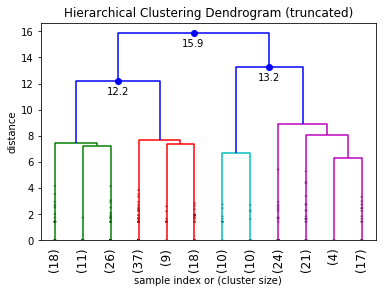

In [32]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

In [41]:
from scipy.cluster.hierarchy import fcluster
max_d = 5
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([19, 19, 17,  8,  8,  8,  8,  8,  8,  2, 12, 12, 12, 12, 12, 12, 12,
       12,  4,  4,  5,  4,  4,  2,  6,  5,  5,  8,  6,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  8,  4,  5,  4,  5, 19, 16, 16, 17,  4,
        4,  4,  5,  5, 18, 18, 18, 18,  4,  5,  4,  5,  9,  6, 14,  9, 11,
       11, 11, 11, 17, 17, 17, 17, 19,  4,  4,  4,  1,  1,  4,  1,  1,  1,
        5,  5,  5,  5,  4,  9,  4,  5,  6,  4,  4,  5,  6,  4,  6,  5, 16,
       16, 16, 17, 17, 17, 13, 10, 13, 10, 13, 10, 13, 10, 13, 10, 13,  4,
        1,  6,  6,  6,  6,  1, 19, 15, 15, 15, 17,  8,  2,  2,  8,  2,  8,
        2,  2,  4,  4,  4,  7,  7,  7,  7,  7,  7,  7,  7,  7,  4,  4,  6,
        6,  6,  6,  5,  6,  9,  9,  5,  6,  5, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19,  8,  9,  6,  8,  6, 19, 19, 16, 16,  9,  2,  9,  8,  8,
        9,  8,  2,  2,  8,  9,  8, 14, 14, 14, 14, 14, 14, 14, 14, 17, 11,
       14], dtype=int32)

In [42]:
result = obj_df
result['res'] = clusters

In [43]:
result

make fuel_type aspiration num_doors   body_style drive_wheels  \
0    alfa-romero       gas        std       two  convertible          rwd   
1    alfa-romero       gas        std       two  convertible          rwd   
2    alfa-romero       gas        std       two    hatchback          rwd   
3           audi       gas        std      four        sedan          fwd   
4           audi       gas        std      four        sedan          4wd   
5           audi       gas        std       two        sedan          fwd   
6           audi       gas        std      four        sedan          fwd   
7           audi       gas        std      four        wagon          fwd   
8           audi       gas      turbo      four        sedan          fwd   
9           audi       gas      turbo       two    hatchback          4wd   
10           bmw       gas        std       two        sedan          rwd   
11           bmw       gas        std      four        sedan          rwd   
12           bmw       gas        std       two        sedan          rwd   
13           bmw       gas        std      four        sedan          rwd   
14           bmw       gas        std      four        sedan          rwd   
15           bmw       gas        std      four        sedan          rwd   
16           bmw       gas        std       two        sedan          rwd   
17           bmw       gas        std      four        sedan          rwd   
18     chevrolet       gas        std       two    hatchback          fwd   
19     chevrolet       gas        std       two    hatchback          fwd   
20     chevrolet       gas        std      four        sedan          fwd   
21         dodge       gas        std       two    hatchback          fwd   
22         dodge       gas        std       two    hatchback          fwd   
23         dodge       gas      turbo       two    hatchback          fwd   
24         dodge       gas        std      four    hatchback          fwd   
25         dodge       gas        std      four        sedan          fwd   
26         dodge       gas        std      four        sedan          fwd   
27         dodge       gas      turbo      four        sedan          fwd   
28         dodge       gas        std      four        wagon          fwd   
29         dodge       gas      turbo       two    hatchback          fwd   
..           ...       ...        ...       ...          ...          ...   
175       toyota       gas        std      four    hatchback          fwd   
176       toyota       gas        std      four        sedan          fwd   
177       toyota       gas        std      four    hatchback          fwd   
178       toyota       gas        std       two    hatchback          rwd   
179       toyota       gas        std       two    hatchback          rwd   
180       toyota       gas        std      four        sedan          rwd   
181       toyota       gas        std      four        wagon          rwd   
182   volkswagen    diesel        std       two        sedan          fwd   
183   volkswagen       gas        std       two        sedan          fwd   
184   volkswagen    diesel        std      four        sedan          fwd   
185   volkswagen       gas        std      four        sedan          fwd   
186   volkswagen       gas        std      four        sedan          fwd   
187   volkswagen    diesel      turbo      four        sedan          fwd   
188   volkswagen       gas        std      four        sedan          fwd   
189   volkswagen       gas        std       two  convertible          fwd   
190   volkswagen       gas        std       two    hatchback          fwd   
191   volkswagen       gas        std      four        sedan          fwd   
192   volkswagen    diesel      turbo      four        sedan          fwd   
193   volkswagen       gas        std      four        wagon          fwd   
194        volvo       gas        std      four        sedan          rwd   
195     

In [47]:
sorted = result.sort_values(by=['res'])
sorted

make fuel_type aspiration num_doors   body_style drive_wheels  \
83      mitsubishi       gas      turbo       two    hatchback          fwd   
119       plymouth       gas      turbo       two    hatchback          fwd   
84      mitsubishi       gas      turbo       two    hatchback          fwd   
82      mitsubishi       gas      turbo       two    hatchback          fwd   
80      mitsubishi       gas      turbo       two    hatchback          fwd   
79      mitsubishi       gas      turbo       two    hatchback          fwd   
124       plymouth       gas      turbo       two    hatchback          rwd   
189     volkswagen       gas        std       two  convertible          fwd   
190     volkswagen       gas        std       two    hatchback          fwd   
131        renault       gas        std       two    hatchback          fwd   
132           saab       gas        std       two    hatchback          fwd   
134           saab       gas        std       two    hatchback          fwd   
136           saab       gas      turbo       two    hatchback          fwd   
137           saab       gas      turbo      four        sedan          fwd   
29           dodge       gas      turbo       two    hatchback          fwd   
23           dodge       gas      turbo       two    hatchback          fwd   
183     volkswagen       gas        std       two        sedan          fwd   
9             audi       gas      turbo       two    hatchback          4wd   
39           honda       gas        std      four        sedan          fwd   
38           honda       gas        std       two    hatchback          fwd   
37           honda       gas        std       two    hatchback          fwd   
36           honda       gas        std      four        wagon          fwd   
35           honda       gas        std      four        sedan          fwd   
34           honda       gas        std       two    hatchback          fwd   
33           honda       gas        std       two    hatchback          fwd   
32           honda       gas        std       two    hatchback          fwd   
31           honda       gas        std       two    hatchback          fwd   
30           honda       gas        std       two    hatchback          fwd   
40           honda       gas        std      four        sedan          fwd   
151         toyota       gas        std       two    hatchback          fwd   
..             ...       ...        ...       ...          ...          ...   
104         nissan       gas        std       two    hatchback          rwd   
105         nissan       gas      turbo       two    hatchback          rwd   
106         nissan       gas        std       two    hatchback          rwd   
129        porsche       gas        std       two    hatchback          rwd   
73   mercedes-benz       gas        std      four        sedan          rwd   
49          jaguar       gas        std       two        sedan          rwd   
2      alfa-romero       gas        std       two    hatchback          rwd   
202          volvo       gas        std      four        sedan          rwd   
74   mercedes-benz       gas        std       two      hardtop          rwd   
56           mazda       gas        std       two    hatchback          rwd   
58           mazda       gas        std       two    hatchback          rwd   
55           mazda       gas        std       two    hatchback          rwd   
57           mazda       gas        std       two    hatchback          rwd   
46           isuzu       gas        std       two    hatchback          rwd   
1      alfa-romero       gas        std       two  convertible          rwd   
169         toyota       gas        std       two    hatchback          rwd   
168         toyota       gas        std       two      hardtop          rwd   
125        porsche       gas        std       two    hatchback          rwd   
179         toyota       gas        std       two    hatchback  

In [53]:
from sklearn.datasets import make_circles
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB
hasher = RandomTreesEmbedding(n_estimators=10, random_state=0, max_depth=3)
X_transformed = hasher.fit_transform(dummies)
X_transformed

<205x66 sparse matrix of type '<class 'numpy.float64'>'
	with 2050 stored elements in Compressed Sparse Row format>

In [54]:
# Visualize result after dimensionality reduction using truncated SVD
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X_transformed)


In [86]:
corr_matrix = df.corr().abs()
high_corr_var=np.where(corr_matrix>0.7)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y], corr_matrix.iloc[x][y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [87]:
high_corr_var

[('wheel_base', 'length', 0.8745874759642641),
 ('wheel_base', 'width', 0.7951436436169699),
 ('wheel_base', 'curb_weight', 0.7763863277822105),
 ('length', 'width', 0.8411182684818458),
 ('length', 'curb_weight', 0.8777284608306424),
 ('length', 'highway_mpg', 0.7046616035425506),
 ('width', 'curb_weight', 0.8670324646791235),
 ('width', 'engine_size', 0.7354334047796375),
 ('width', 'price', 0.7512653440522672),
 ('curb_weight', 'engine_size', 0.8505940734262771),
 ('curb_weight', 'horsepower', 0.7510342745864709),
 ('curb_weight', 'city_mpg', 0.7574137845056008),
 ('curb_weight', 'highway_mpg', 0.7974647922811804),
 ('curb_weight', 'price', 0.8344145257702835),
 ('engine_size', 'horsepower', 0.8107725559959597),
 ('engine_size', 'price', 0.8723351674455199),
 ('horsepower', 'city_mpg', 0.8036201591529725),
 ('horsepower', 'highway_mpg', 0.7709076931171814),
 ('horsepower', 'price', 0.8105330821322057),
 ('city_mpg', 'highway_mpg', 0.9713370423425063),
 ('highway_mpg', 'price', 0.704

0.5286667062477991